<a href="https://colab.research.google.com/github/MateoGlz/Progra-Analitica-Descriptica-Predictiva/blob/main/_19_Ejercicios_con_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
columnas_numericas = ['age', 'year', 'nodes']

df = pd.read_csv(url, header=None, names=column_names)
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [27]:
print(df.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


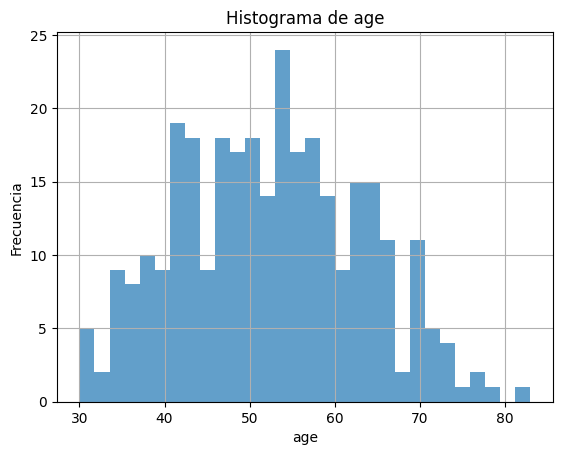

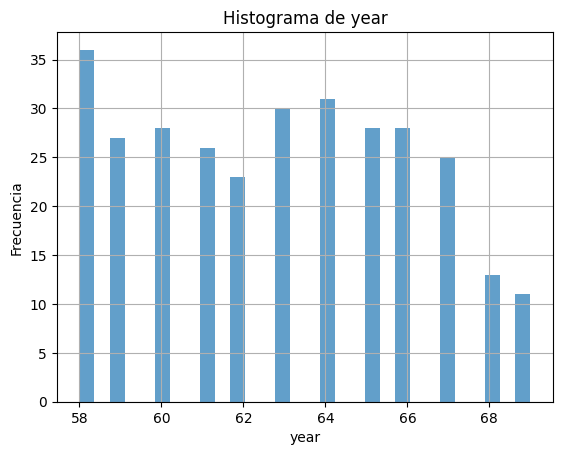

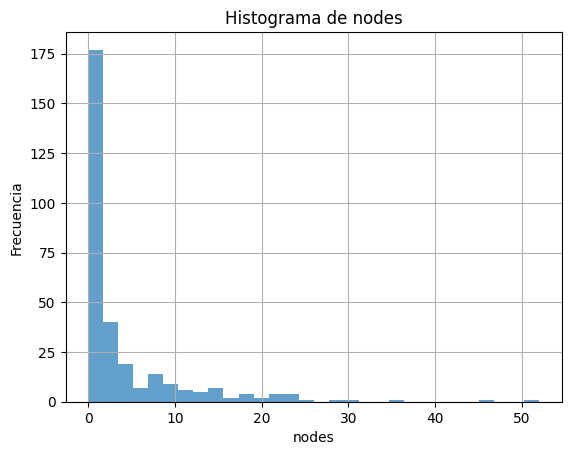

In [28]:
import matplotlib.pyplot as plt


for columna in columnas_numericas:
    df[columna].hist(bins=30, alpha=0.7)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

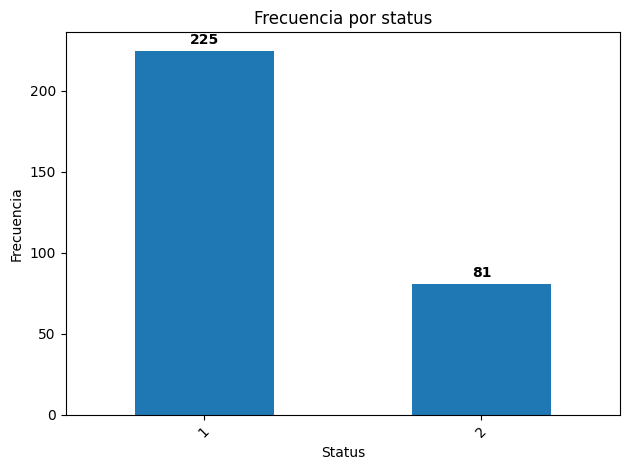

In [29]:

    counts = df['status'].value_counts()
    ax = counts.plot(kind='bar')
    plt.title(f'Frecuencia por status')
    plt.xlabel('Status')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    # Añadir las cantidades en las barras
    for i, v in enumerate(counts):
        ax.text(i, v + 0.01 * counts.max(), str(v),
                ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

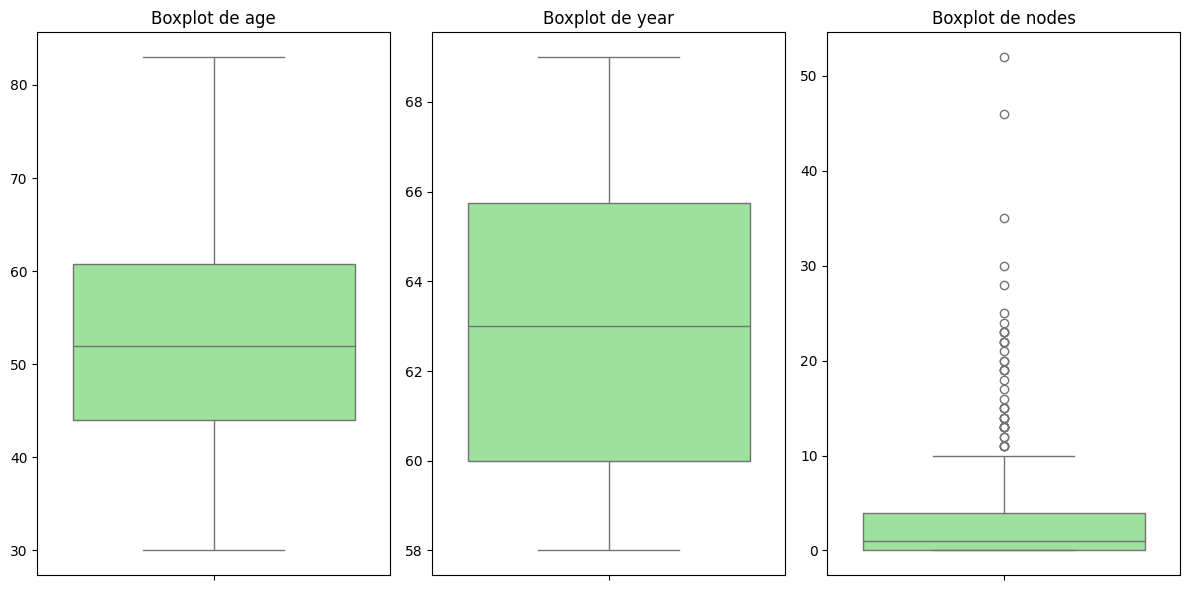

In [30]:

import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(columnas_numericas), figsize=(4*len(columnas_numericas), 6))

if len(columnas_numericas) == 1:
    axes = [axes]

for i, columna in enumerate(columnas_numericas):
    sns.boxplot(y=df[columna], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot de {columna}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Matriz de Correlación:
         age   year  nodes
age    1.000  0.090 -0.063
year   0.090  1.000 -0.004
nodes -0.063 -0.004  1.000


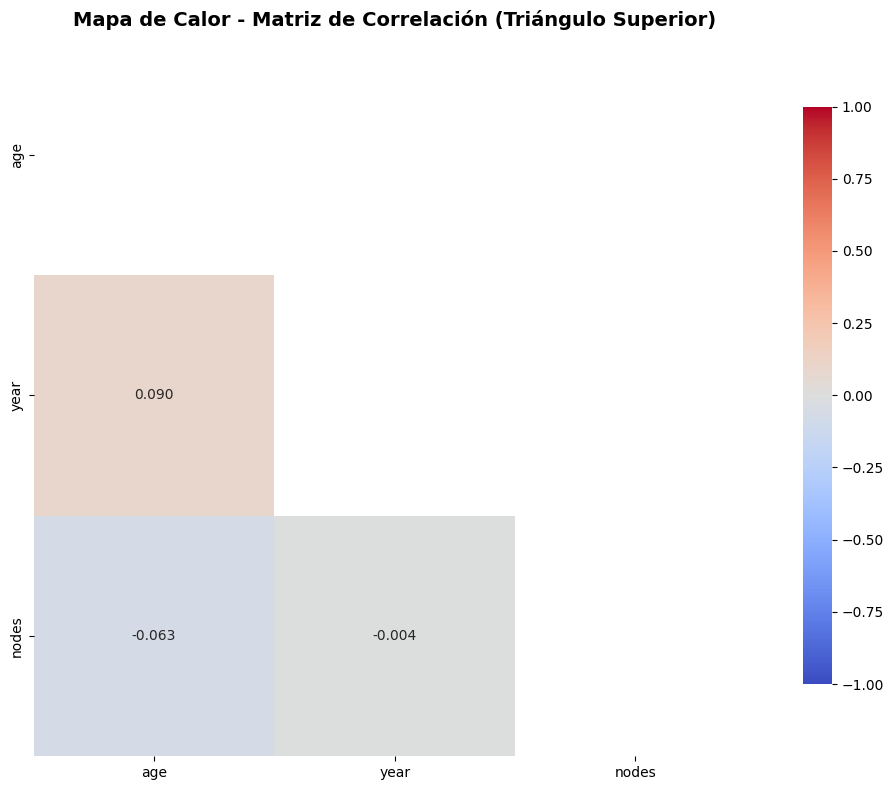

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[columnas_numericas].corr()

print("Matriz de Correlación:")
print(correlation_matrix.round(3))

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            fmt='.3f',
            mask=mask,
            cbar_kws={'shrink': 0.8})

plt.title('Mapa de Calor - Matriz de Correlación (Triángulo Superior)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

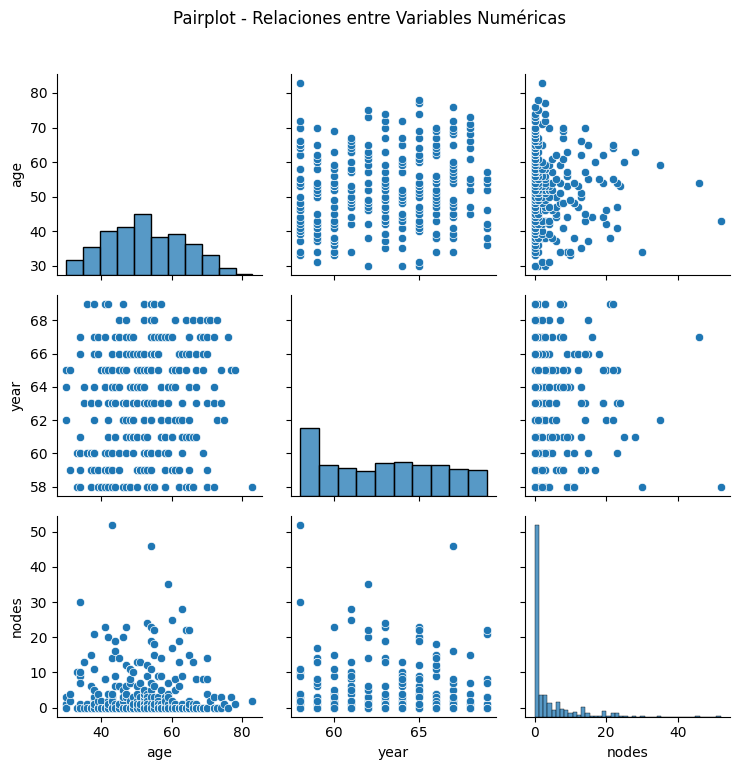

In [32]:

sns.pairplot(df[columnas_numericas])
plt.suptitle('Pairplot - Relaciones entre Variables Numéricas', y=1.02)
plt.tight_layout()
plt.show()

 PRUEBAS DE NORMALIDAD

 VARIABLE: age
   Muestra: 306 datos | Media: 52.46 | Desv: 10.80
--------------------------------------------------
• Shapiro-Wilk:    p = 0.026047 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.469797 | ✅ Normal
• Anderson-Darling:  stat = 0.7316 | ✅ Normal (stat < 0.7770)


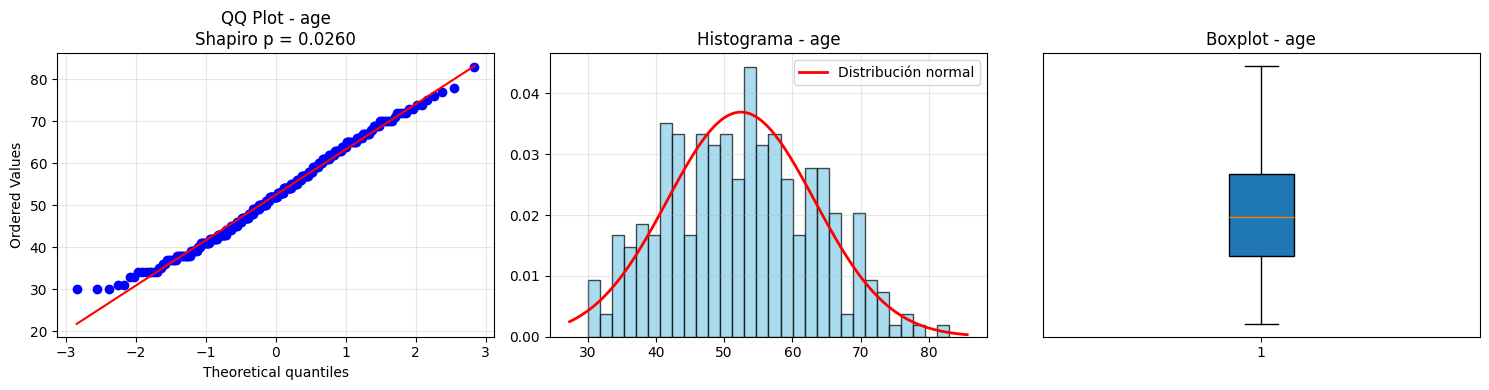


 VARIABLE: year
   Muestra: 306 datos | Media: 62.85 | Desv: 3.25
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.001577 | ❌ No normal
• Anderson-Darling:  stat = 4.3137 | ❌ No normal (stat >= 0.7770)


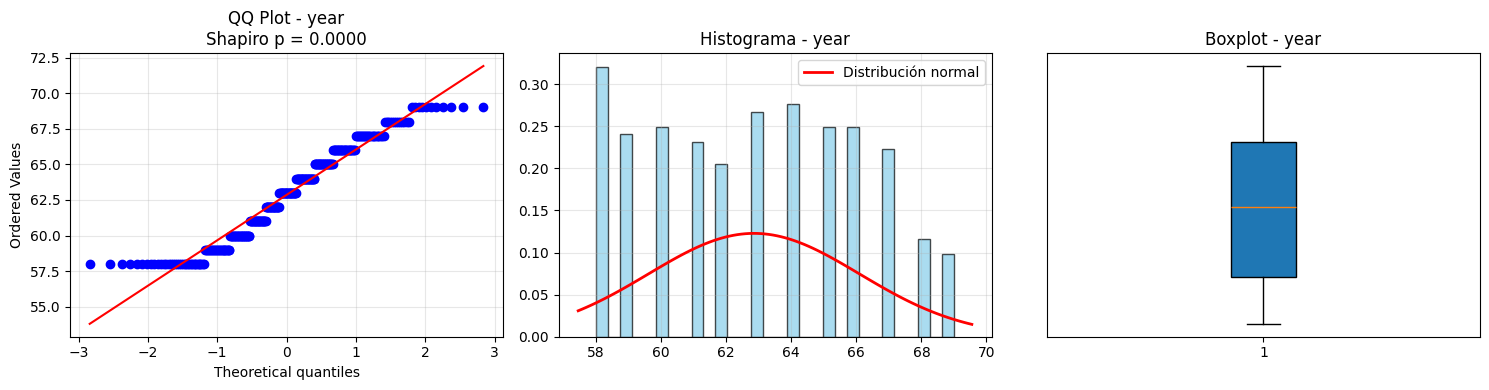


 VARIABLE: nodes
   Muestra: 306 datos | Media: 4.03 | Desv: 7.19
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 39.6866 | ❌ No normal (stat >= 0.7770)


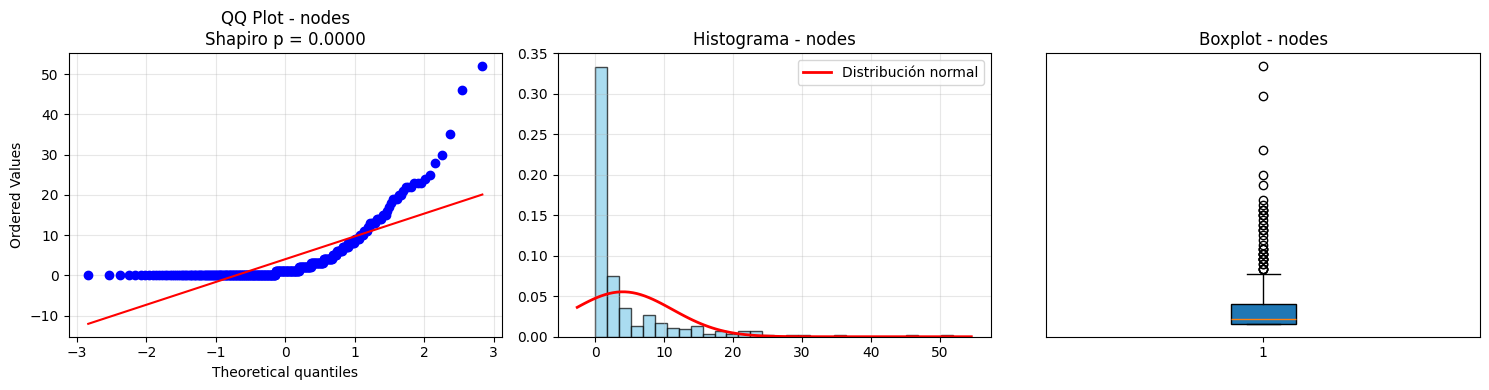


🎯 RESUMEN DE NORMALIDAD:
✅ = Distribución normal (p > 0.05)
❌ = Distribución no normal (p ≤ 0.05)
--------------------------------------------------
❌ age: p = 0.026047
❌ year: p = 0.000000
❌ nodes: p = 0.000000


In [33]:
from scipy import stats
import scipy.stats as stats
print(" PRUEBAS DE NORMALIDAD")
print("=" * 70)

for columna in columnas_numericas:
    # Limpiar datos (eliminar NaN)
    data = df[columna].dropna()

    print(f"\n VARIABLE: {columna}")
    print(f"   Muestra: {len(data)} datos | Media: {data.mean():.2f} | Desv: {data.std():.2f}")
    print("-" * 50)

    # 1. Shapiro-Wilk (mejor para muestras < 5000)
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"• Shapiro-Wilk:    p = {shapiro_p:.6f} | {'✅ Normal' if shapiro_p > 0.05 else '❌ No normal'}")

    # 2. Kolmogorov-Smirnov
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"• Kolmogorov-Smirnov: p = {ks_p:.6f} | {'✅ Normal' if ks_p > 0.05 else '❌ No normal'}")

    # 3. Anderson-Darling (más sensible a colas)
    anderson_result = stats.anderson(data, dist='norm')
    print(f"• Anderson-Darling:  stat = {anderson_result.statistic:.4f} | ", end='')

    # Comparar con valor crítico al 5%
    critical_5 = anderson_result.critical_values[2]  # Valor crítico al 5%
    if anderson_result.statistic < critical_5:
        print(f"✅ Normal (stat < {critical_5:.4f})")
    else:
        print(f"❌ No normal (stat >= {critical_5:.4f})")

    # Crear gráficos de diagnóstico
    plt.figure(figsize=(15, 4))

    # Subplot 1: QQ Plot
    plt.subplot(1, 3, 1)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ Plot - {columna}\nShapiro p = {shapiro_p:.4f}')
    plt.grid(True, alpha=0.3)

    # Subplot 2: Histograma + curva normal
    plt.subplot(1, 3, 2)
    plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, data.mean(), data.std())
    plt.plot(x, p, 'r-', linewidth=2, label='Distribución normal')
    plt.title(f'Histograma - {columna}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Subplot 3: Boxplot para ver outliers
    plt.subplot(1, 3, 3)
    plt.boxplot(data, patch_artist=True)
    plt.gca().get_yaxis().set_visible(False)  # Ocultar eje Y
    plt.title(f'Boxplot - {columna}')

    plt.tight_layout()
    plt.show()

    print("=" * 70)

# Resumen final
print("\n🎯 RESUMEN DE NORMALIDAD:")
print("✅ = Distribución normal (p > 0.05)")
print("❌ = Distribución no normal (p ≤ 0.05)")
print("-" * 50)

for columna in columnas_numericas:
    data = df[columna].dropna()
    shapiro_stat, shapiro_p = stats.shapiro(data)
    es_normal = "✅" if shapiro_p > 0.05 else "❌"
    print(f"{es_normal} {columna}: p = {shapiro_p:.6f}")

In [34]:
df.info()

print(df.dtypes)

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
age       int64
year      int64
nodes     int64
status    int64
dtype: object
age       0
year      0
nodes     0
status    0
dtype: int64


In [35]:
data_nulos = df.copy()
data_nulos['nodes'] = data_nulos['nodes'].replace(0, None)

data_nulos.info()

print(data_nulos.dtypes)

print(data_nulos.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     306 non-null    int64 
 1   year    306 non-null    int64 
 2   nodes   170 non-null    object
 3   status  306 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.7+ KB
age        int64
year       int64
nodes     object
status     int64
dtype: object
age         0
year        0
nodes     136
status      0
dtype: int64


In [36]:
# Análisis de ganglios axilares (nodes)
print("🔍 ANÁLISIS DE GANGLIOS AXILARES POSITIVOS:")
print("=" * 50)

# Definir rangos clínicamente relevantes
rangos = {
    "0 ganglios": (0, 0),
    "1-3 ganglios": (1, 3),
    "4-9 ganglios": (4, 9),
    "10+ ganglios (alto riesgo)": (10, 20),
    "20+ ganglios (sospechosos)": (20, 40),
    "40+ ganglios (imposibles)": (40, 1000)
}

total_pacientes = len(df)

print("📊 DISTRIBUCIÓN POR RANGO DE GANGLIOS:")
for nombre_rango, (min_val, max_val) in rangos.items():
    if max_val == 1000:  # Para el último rango
        count = (df['nodes'] >= min_val).sum()
    else:
        count = ((df['nodes'] >= min_val) & (df['nodes'] <= max_val)).sum()

    porcentaje = (count / total_pacientes) * 100
    print(f"• {nombre_rango}: {count} pacientes ({porcentaje:.1f}%)")

# Análisis específico de valores extremos
print(f"\n🚨 VALORES EXTREMOS:")
print(f"• Pacientes con > 10 ganglios: {(df['nodes'] > 10).sum()} ({((df['nodes'] > 10).sum()/total_pacientes)*100:.1f}%)")
print(f"• Pacientes con > 20 ganglios: {(df['nodes'] > 20).sum()} ({((df['nodes'] > 20).sum()/total_pacientes)*100:.1f}%)")
print(f"• Pacientes con > 40 ganglios: {(df['nodes'] > 40).sum()} ({((df['nodes'] > 40).sum()/total_pacientes)*100:.1f}%)")

# Mostrar los registros más extremos
print(f"\n🔍 REGISTROS MÁS EXTREMOS:")
valores_extremos = df[df['nodes'] > 20].sort_values('nodes', ascending=False)
print(valores_extremos[['age', 'year', 'nodes', 'status']].head(10))

# Estadísticas clave
print(f"\n📈 ESTADÍSTICAS CLÍNICAS:")
print(f"• Mediana de ganglios positivos: {df['nodes'].median()}")
print(f"• 95% de pacientes tienen ≤ {df['nodes'].quantile(0.95):.0f} ganglios")
print(f"• 99% de pacientes tienen ≤ {df['nodes'].quantile(0.99):.0f} ganglios")

🔍 ANÁLISIS DE GANGLIOS AXILARES POSITIVOS:
📊 DISTRIBUCIÓN POR RANGO DE GANGLIOS:
• 0 ganglios: 136 pacientes (44.4%)
• 1-3 ganglios: 81 pacientes (26.5%)
• 4-9 ganglios: 46 pacientes (15.0%)
• 10+ ganglios (alto riesgo): 29 pacientes (9.5%)
• 20+ ganglios (sospechosos): 14 pacientes (4.6%)
• 40+ ganglios (imposibles): 2 pacientes (0.7%)

🚨 VALORES EXTREMOS:
• Pacientes con > 10 ganglios: 40 (13.1%)
• Pacientes con > 20 ganglios: 14 (4.6%)
• Pacientes con > 40 ganglios: 2 (0.7%)

🔍 REGISTROS MÁS EXTREMOS:
     age  year  nodes  status
62    43    58     52       2
174   54    67     46       1
215   59    62     35       2
9     34    58     30       1
252   63    61     28       1
227   60    61     25       1
160   53    63     24       2
168   54    65     23       2
43    41    60     23       2
96    47    63     23       2

📈 ESTADÍSTICAS CLÍNICAS:
• Mediana de ganglios positivos: 1.0
• 95% de pacientes tienen ≤ 20 ganglios
• 99% de pacientes tienen ≤ 30 ganglios


In [37]:
# 1. Eliminar imposibles (>40)
df_clean = df[df['nodes'] <= 40].copy()

# 2. Mantener sospechosos (20-40) pero documentar
casos_raros = df_clean[df_clean['nodes'] >= 20]
print(f"📝 Se mantienen {len(casos_raros)} casos raros (20-40 ganglios)")

# 3. Dataset final listo para análisis
print(f"🎯 Dataset final: {len(df_clean)} registros")
print(f"📊 Rango de 'nodes': {df_clean['nodes'].min()} - {df_clean['nodes'].max()}")

📝 Se mantienen 14 casos raros (20-40 ganglios)
🎯 Dataset final: 304 registros
📊 Rango de 'nodes': 0 - 35


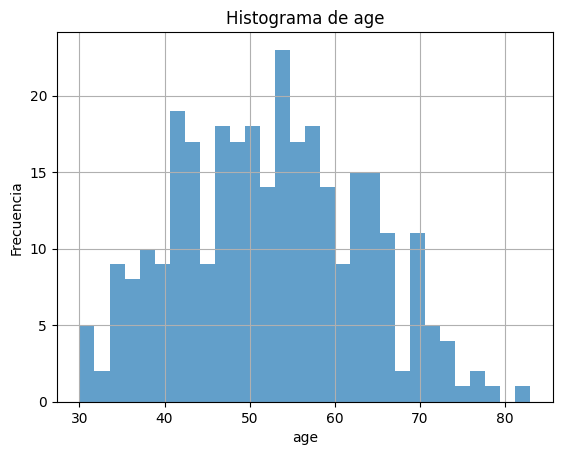

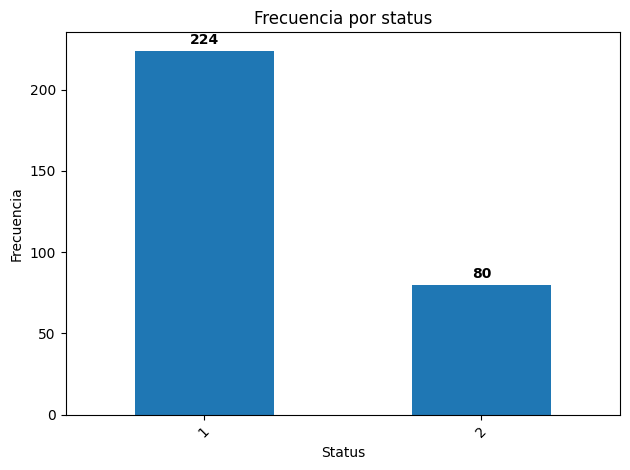

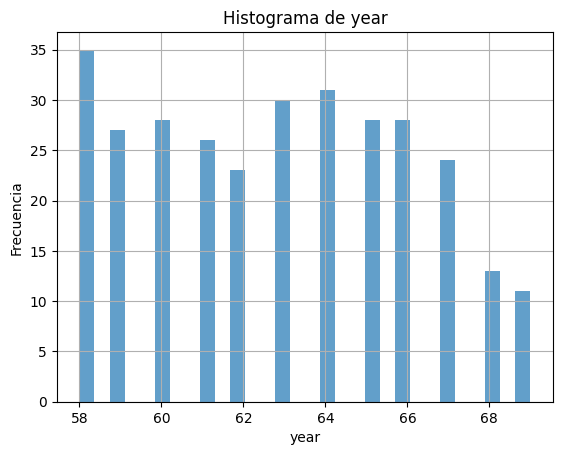

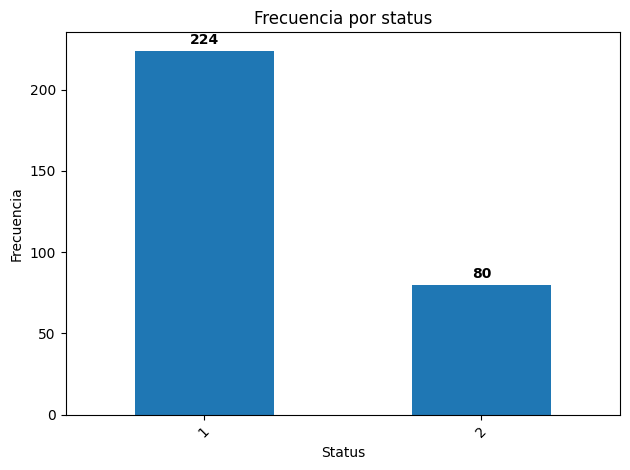

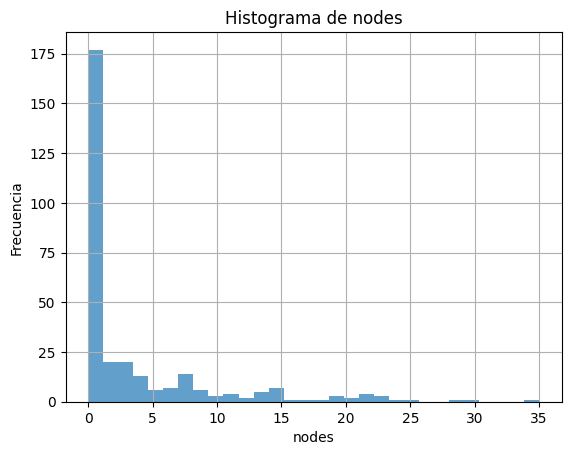

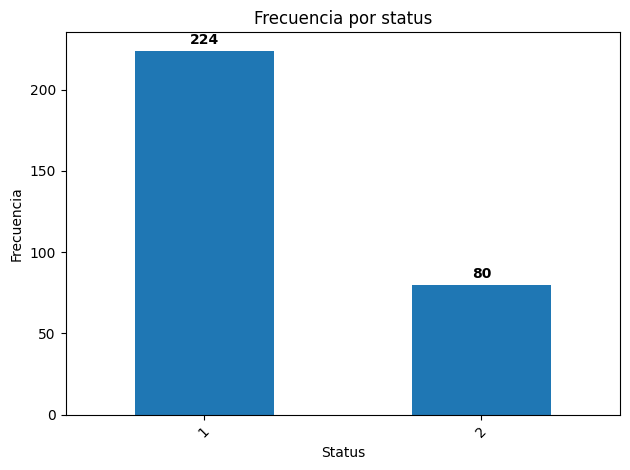

In [38]:
import matplotlib.pyplot as plt


for columna in columnas_numericas:
    df_clean[columna].hist(bins=30, alpha=0.7)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()


    counts = df_clean['status'].value_counts()
    ax = counts.plot(kind='bar')
    plt.title(f'Frecuencia por status')
    plt.xlabel('Status')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    # Añadir las cantidades en las barras
    for i, v in enumerate(counts):
        ax.text(i, v + 0.01 * counts.max(), str(v),
                ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()



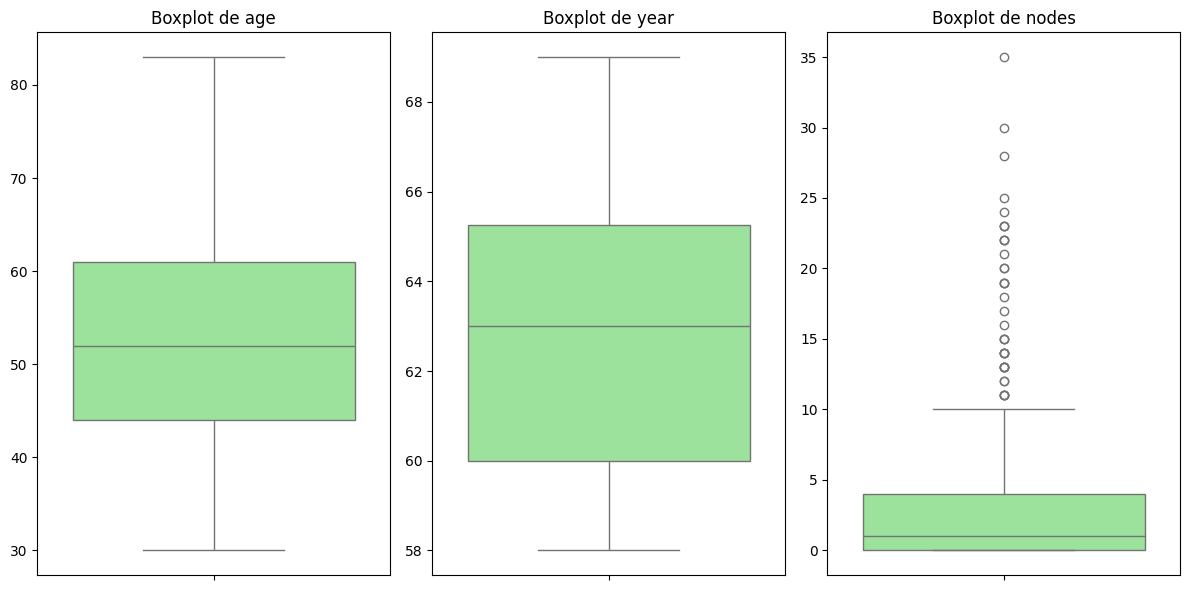

In [39]:



import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(columnas_numericas), figsize=(4*len(columnas_numericas), 6))

if len(columnas_numericas) == 1:
    axes = [axes]

for i, columna in enumerate(columnas_numericas):
    sns.boxplot(y=df_clean[columna], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot de {columna}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()



Matriz de Correlación (incluyendo status):
          age   year  nodes  status
age     1.000  0.085 -0.054   0.073
year    0.085  1.000  0.005   0.006
nodes  -0.054  0.005  1.000   0.306
status  0.073  0.006  0.306   1.000


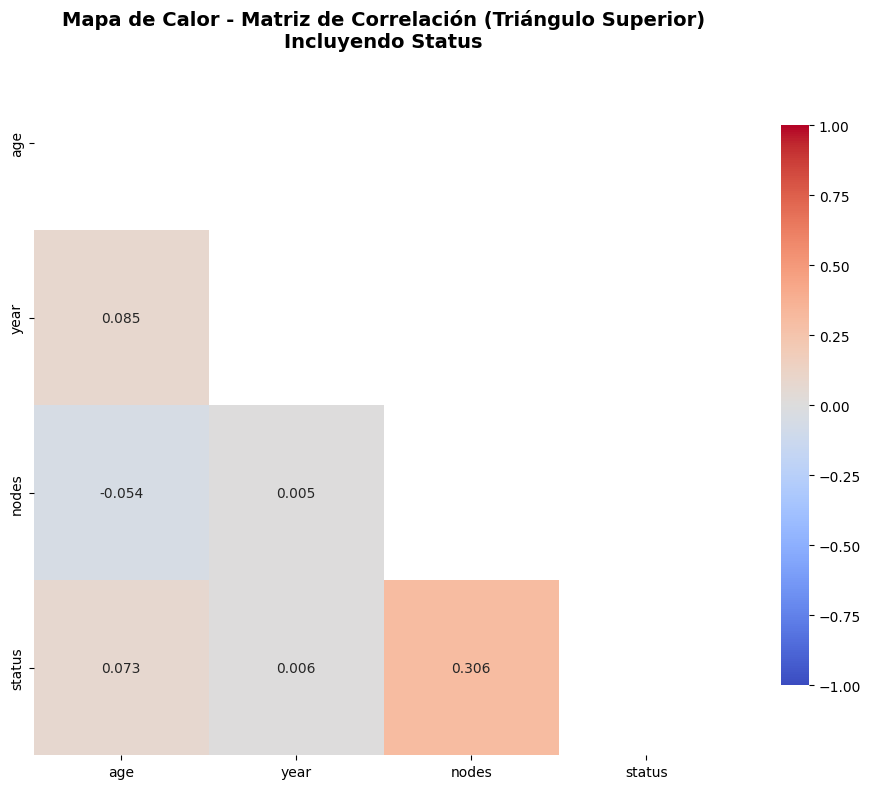

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Incluir status en el análisis de correlación
columnas_numericas = ['age', 'year', 'nodes', 'status']

correlation_matrix = df_clean[columnas_numericas].corr()

print("Matriz de Correlación (incluyendo status):")
print(correlation_matrix.round(3))

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            fmt='.3f',
            mask=mask,
            cbar_kws={'shrink': 0.8})

plt.title('Mapa de Calor - Matriz de Correlación (Triángulo Superior)\nIncluyendo Status',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

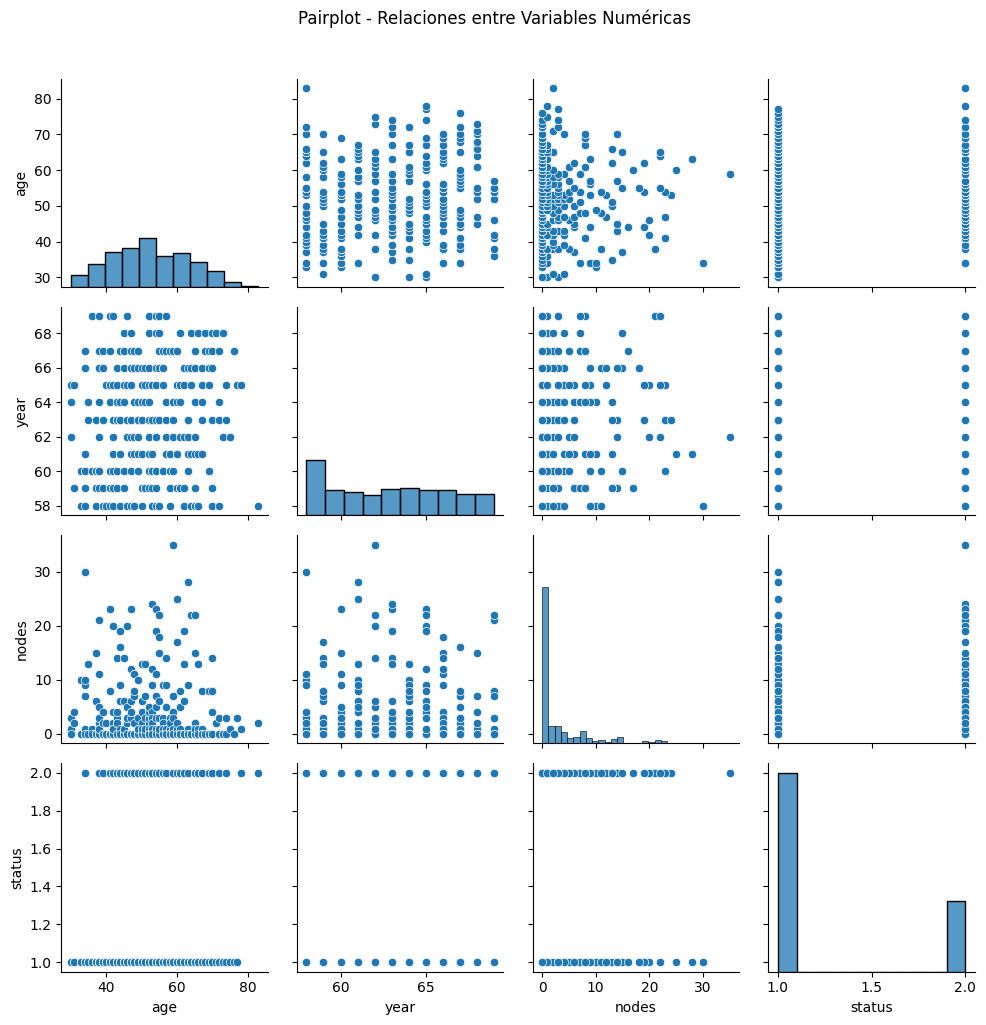

In [41]:
sns.pairplot(df_clean[columnas_numericas])
plt.suptitle('Pairplot - Relaciones entre Variables Numéricas', y=1.02)
plt.tight_layout()
plt.show()

 PRUEBAS DE NORMALIDAD

 VARIABLE: age
   Muestra: 304 datos | Media: 52.48 | Desv: 10.83
--------------------------------------------------
Shapiro-Wilk:    p = 0.026674 | ❌ No normal
Kolmogorov-Smirnov: p = 0.516000 | ✅ Normal
Anderson-Darling:  stat = 0.7226 | ✅ Normal (stat < 0.7770)


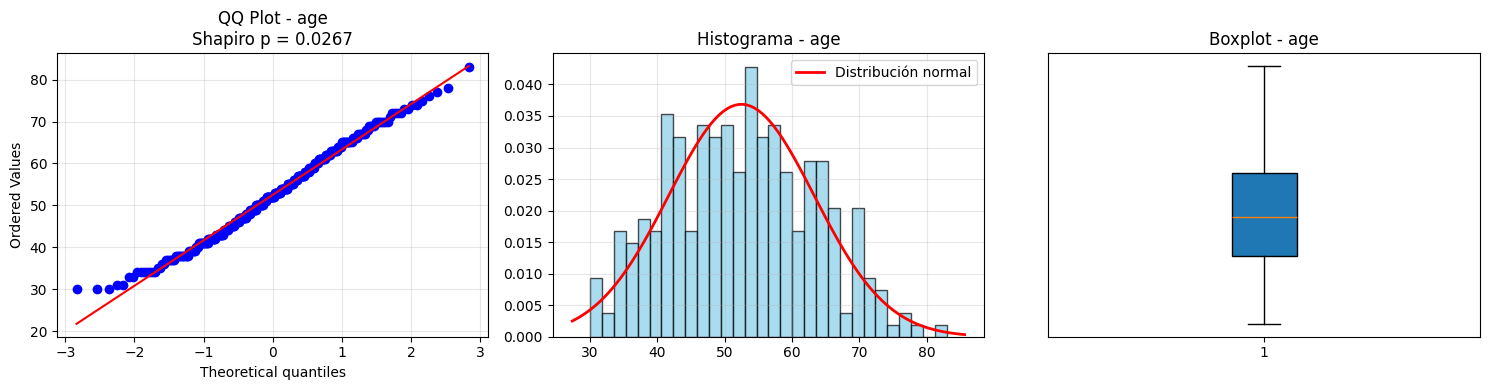


 VARIABLE: year
   Muestra: 304 datos | Media: 62.86 | Desv: 3.24
--------------------------------------------------
Shapiro-Wilk:    p = 0.000000 | ❌ No normal
Kolmogorov-Smirnov: p = 0.001742 | ❌ No normal
Anderson-Darling:  stat = 4.1943 | ❌ No normal (stat >= 0.7770)


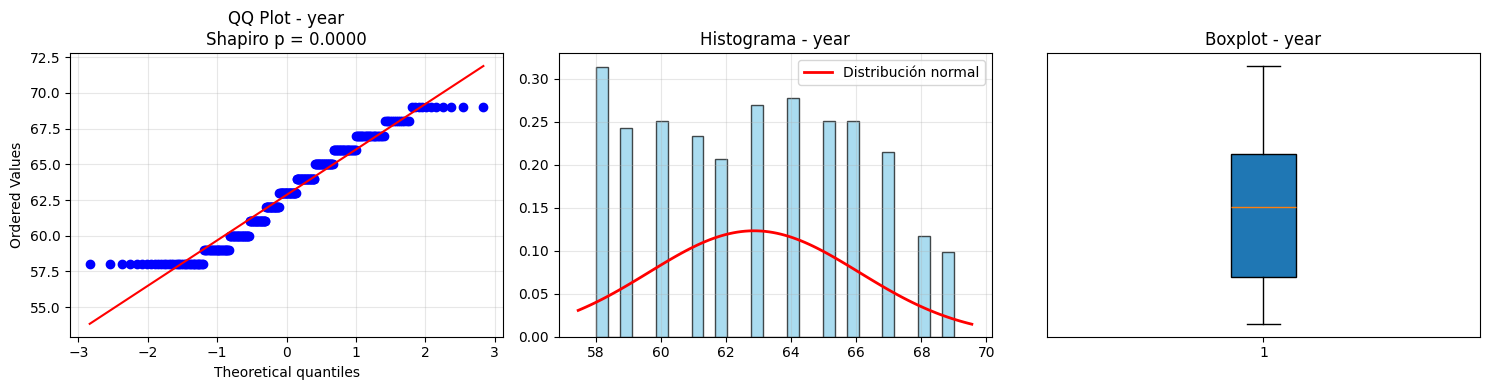


 VARIABLE: nodes
   Muestra: 304 datos | Media: 3.73 | Desv: 6.21
--------------------------------------------------
Shapiro-Wilk:    p = 0.000000 | ❌ No normal
Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
Anderson-Darling:  stat = 38.2363 | ❌ No normal (stat >= 0.7770)


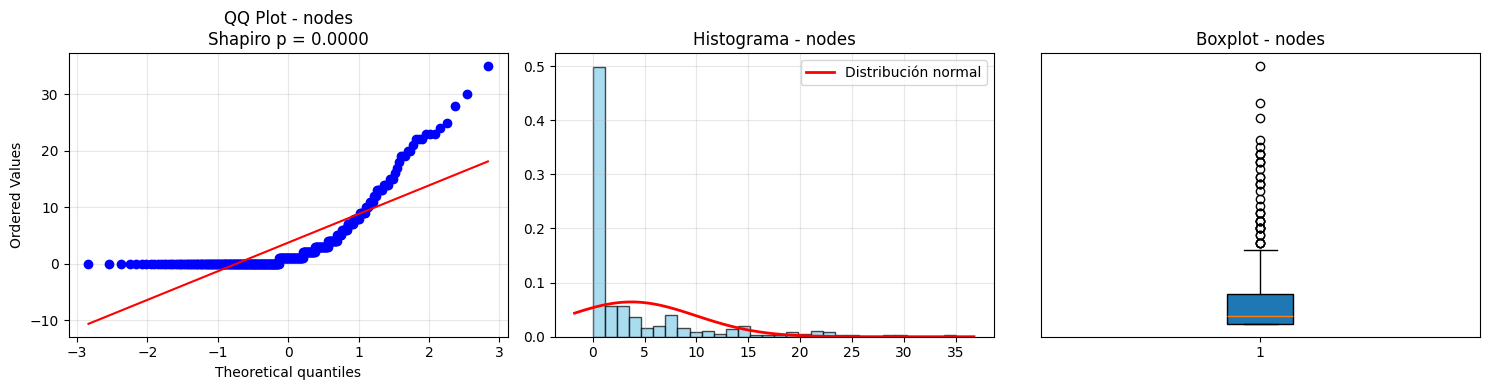


 VARIABLE: status
   Muestra: 304 datos | Media: 1.26 | Desv: 0.44
--------------------------------------------------
Shapiro-Wilk:    p = 0.000000 | ❌ No normal
Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
Anderson-Darling:  stat = 70.9311 | ❌ No normal (stat >= 0.7770)


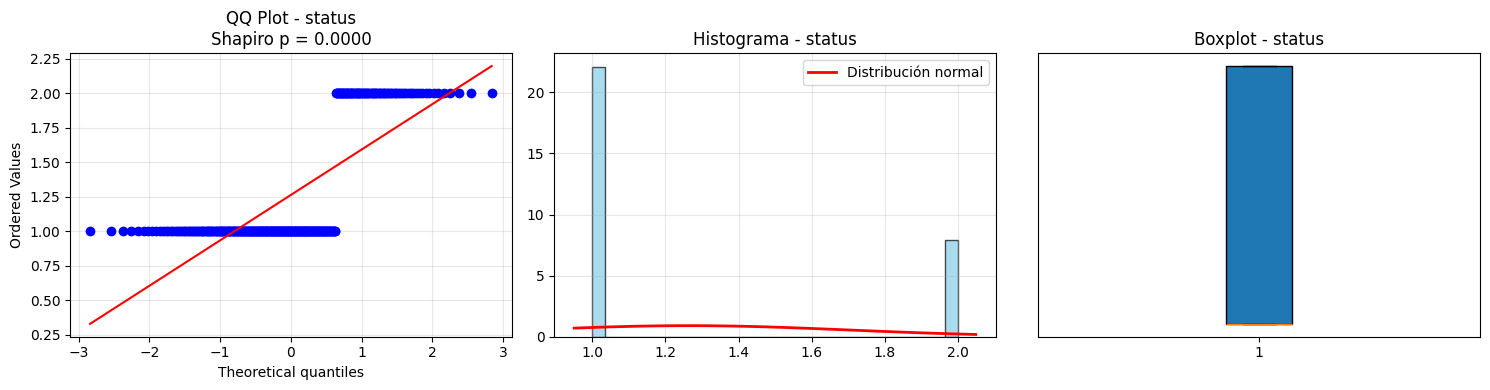


 RESUMEN DE NORMALIDAD:
✅ = Distribución normal (p > 0.05)
❌ = Distribución no normal (p ≤ 0.05)
--------------------------------------------------
❌ age: p = 0.026674
❌ year: p = 0.000000
❌ nodes: p = 0.000000
❌ status: p = 0.000000


In [42]:
from scipy import stats
import scipy.stats as stats
print(" PRUEBAS DE NORMALIDAD")
print("=" * 70)

for columna in columnas_numericas:
    # Limpiar datos (eliminar NaN)
    data = df_clean[columna].dropna()

    print(f"\n VARIABLE: {columna}")
    print(f"   Muestra: {len(data)} datos | Media: {data.mean():.2f} | Desv: {data.std():.2f}")
    print("-" * 50)

    # 1. Shapiro-Wilk (mejor para muestras < 5000)
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Shapiro-Wilk:    p = {shapiro_p:.6f} | {'✅ Normal' if shapiro_p > 0.05 else '❌ No normal'}")

    # 2. Kolmogorov-Smirnov
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov: p = {ks_p:.6f} | {'✅ Normal' if ks_p > 0.05 else '❌ No normal'}")

    # 3. Anderson-Darling (más sensible a colas)
    anderson_result = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling:  stat = {anderson_result.statistic:.4f} | ", end='')

    # Comparar con valor crítico al 5%
    critical_5 = anderson_result.critical_values[2]  # Valor crítico al 5%
    if anderson_result.statistic < critical_5:
        print(f"✅ Normal (stat < {critical_5:.4f})")
    else:
        print(f"❌ No normal (stat >= {critical_5:.4f})")

    # Crear gráficos de diagnóstico
    plt.figure(figsize=(15, 4))

    # Subplot 1: QQ Plot
    plt.subplot(1, 3, 1)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ Plot - {columna}\nShapiro p = {shapiro_p:.4f}')
    plt.grid(True, alpha=0.3)

    # Subplot 2: Histograma + curva normal
    plt.subplot(1, 3, 2)
    plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, data.mean(), data.std())
    plt.plot(x, p, 'r-', linewidth=2, label='Distribución normal')
    plt.title(f'Histograma - {columna}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Subplot 3: Boxplot para ver outliers
    plt.subplot(1, 3, 3)
    plt.boxplot(data, patch_artist=True)
    plt.gca().get_yaxis().set_visible(False)  # Ocultar eje Y
    plt.title(f'Boxplot - {columna}')

    plt.tight_layout()
    plt.show()

    print("=" * 70)

# Resumen final
print("\n RESUMEN DE NORMALIDAD:")
print("✅ = Distribución normal (p > 0.05)")
print("❌ = Distribución no normal (p ≤ 0.05)")
print("-" * 50)

for columna in columnas_numericas:
    data = df_clean[columna].dropna()
    shapiro_stat, shapiro_p = stats.shapiro(data)
    es_normal = "✅" if shapiro_p > 0.05 else "❌"
    print(f"{es_normal} {columna}: p = {shapiro_p:.6f}")

In [43]:
# Análisis de la variable status
print(" DISTRIBUCIÓN DE SUPERVIVENCIA (status):")
print("=" * 50)

# Conteo de cada categoría
conteo_status = df['status'].value_counts()
porcentaje_status = df['status'].value_counts(normalize=True) * 100

print(" DISTRIBUCIÓN:")
print(f"Status 1: {conteo_status[1]} pacientes ({porcentaje_status[1]:.1f}%)")
print(f"Status 2: {conteo_status[2]} pacientes ({porcentaje_status[2]:.1f}%)")

print(f"\n INTERPRETACIÓN:")
print("1 = Paciente sobrevivió (224 pacientes - 73.2%)")
print("2 = Paciente no sobrevivió (80 pacientes - 26.8%)")

print(f"\n RESUMEN:")
print(f"Tasa de supervivencia: {porcentaje_status[1]:.1f}%")
print(f"Tasa de mortalidad: {porcentaje_status[2]:.1f}%")

 DISTRIBUCIÓN DE SUPERVIVENCIA (status):
 DISTRIBUCIÓN:
Status 1: 225 pacientes (73.5%)
Status 2: 81 pacientes (26.5%)

 INTERPRETACIÓN:
1 = Paciente sobrevivió (224 pacientes - 73.2%)
2 = Paciente no sobrevivió (80 pacientes - 26.8%)

 RESUMEN:
Tasa de supervivencia: 73.5%
Tasa de mortalidad: 26.5%


In [44]:
# Análisis de ganglios por estado de supervivencia
print("🔍 ANÁLISIS DE GANGLIOS POR ESTADO DE SUPERVIVENCIA:")
print("=" * 60)

# Separar datos por status
sobrevivientes = df_clean[df_clean['status'] == 1]
no_sobrevivientes = df_clean[df_clean['status'] == 2]

print(" GANGLIOS POSITIVOS POR GRUPO:")
print(f"SOBREVIVIENTES (Status 1 - {len(sobrevivientes)} pacientes):")
print(f"  • Promedio: {sobrevivientes['nodes'].mean():.2f} ganglios")
print(f"  • Mediana: {sobrevivientes['nodes'].median():.2f} ganglios")
print(f"  • Moda: {sobrevivientes['nodes'].mode().iloc[0]} ganglios")
print(f"  • Máximo: {sobrevivientes['nodes'].max()} ganglios")

print(f"\nNO SOBREVIVIENTES (Status 2 - {len(no_sobrevivientes)} pacientes):")
print(f"  • Promedio: {no_sobrevivientes['nodes'].mean():.2f} ganglios")
print(f"  • Mediana: {no_sobrevivientes['nodes'].median():.2f} ganglios")
print(f"  • Moda: {no_sobrevivientes['nodes'].mode().iloc[0]} ganglios")
print(f"  • Máximo: {no_sobrevivientes['nodes'].max()} ganglios")

# Diferencia clave
print(f"\n DIFERENCIA CLAVE:")
print(f"  • Diferencia en promedio: {no_sobrevivientes['nodes'].mean() - sobrevivientes['nodes'].mean():.2f} ganglios")
print(f"  • Diferencia en mediana: {no_sobrevivientes['nodes'].median() - sobrevivientes['nodes'].median():.2f} ganglios")

print(f"\n INTERPRETACIÓN:")
print("Los pacientes que NO sobrevivieron tienden a tener MÁS ganglios positivos,")
print("lo que sugiere que el número de ganglios afectados está relacionado con el pronóstico.")

🔍 ANÁLISIS DE GANGLIOS POR ESTADO DE SUPERVIVENCIA:
 GANGLIOS POSITIVOS POR GRUPO:
SOBREVIVIENTES (Status 1 - 224 pacientes):
  • Promedio: 2.60 ganglios
  • Mediana: 0.00 ganglios
  • Moda: 0 ganglios
  • Máximo: 30 ganglios

NO SOBREVIVIENTES (Status 2 - 80 pacientes):
  • Promedio: 6.90 ganglios
  • Mediana: 4.00 ganglios
  • Moda: 0 ganglios
  • Máximo: 35 ganglios

 DIFERENCIA CLAVE:
  • Diferencia en promedio: 4.30 ganglios
  • Diferencia en mediana: 4.00 ganglios

 INTERPRETACIÓN:
Los pacientes que NO sobrevivieron tienden a tener MÁS ganglios positivos,
lo que sugiere que el número de ganglios afectados está relacionado con el pronóstico.
